In [1]:
import piano_reduction.tools as pr
import piano_reduction.compute_features as cf
from piano_reduction.classes import ScoreData, Reduction
from sklearn import metrics
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
data = ScoreData.load('score_data/cosi_%d.pkl' % 8)
k = 0
training_data, testing_data = data.split_in(k * 0.2, k * 0.2 + 0.2)

In [4]:
testing_data.show_score(['x_train', 'y_train'])

In [2]:
reductions = {}
for i, l in tqdm([(a, b) for a in [0, 1, 2, 3, 4] for b in [1, 2, 3, 4, 8, 12, 16, 20]]):
    try:
        reductions['GRU 1 %d %d using cosi_8' % (l, i)] = 'models/20190319l/GRU_1 (%d) (%d) 8.pkl' % (l, i)
    except:
        pass
    try:
        reductions['GRU 2 %d %d using cosi_8' % (l, i)] = 'models/20190319l/GRU_2 (%d) (%d) 8.pkl' % (l, i)
    except:
        pass
    #print(reductions)

100%|██████████| 40/40 [00:00<00:00, 74334.14it/s]


In [3]:
def check_data(name, reds, threshold=0.3, testing_from=0.8, testing_to=0.9):
    _, new_data = ScoreData.load(name).split_in(testing_from, testing_to)
    
    features = ['active_rhythm', 'bass_line', 'entrance_effect', 'highest', 'in_chord', 'lowest', 'occurrence', 
       'onset_after_rest', 'rhythm_variety', 'strong_beats', 'sustained_rhythm', 'vertical_doubling', 'duration_length', 'offset']
    for i in reds:
        if 'GRU' in i:
            new_data = reductions[i].predict(new_data, threshold=threshold, name='y_pred_%s' % i)
        else:
            new_data = reductions[i].predict_2(new_data, threshold=threshold, name='y_pred_%s' % i)
    return new_data

In [28]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
filenames = []
for I in [1]:
    for L in [1, 2, 3, 4, 8]:
        filenames.append('models/20190319l/GRU_%d (%d) (%d) 8.pkl' % (2, L, I))
    #test = ReductionStack(filenames, DecisionTreeClassifier(class_weight='balanced'))
    #test = ReductionStack(filenames, NN(5))
    print(test.models)
    #data, data_test = ScoreData.load('score_data/cosi_8.pkl').split_in(I * 0.2, I * 0.2 + 0.2)
    test.final_model = Dumb()
    test.train(data)
    new_data = test.predict(data_test, 'y_pred', -0.3)
    new_data.df = new_data.df[(new_data.df['x_train'] == 1) | (new_data.df['y_train'] == 1) | (new_data.df['y_pred'] == 1)]
    scores = [metrics.f1_score(new_data.df['y_train'], new_data.df['y_pred']),
              metrics.accuracy_score(new_data.df['y_train'], new_data.df['y_pred']),
              pr.jaccard_similarity(new_data.to_binary(col='y_train'), new_data.to_binary(col='y_pred'))
             ]
    print('%25s\t%20.9f\t%20.9f\t%20.9f' % tuple(['.V.'] + scores))
    for i in range(len(filenames)):
        new_data = test.models[i].predict(data_test, 0.1, 'y_pred')
        new_data.df = new_data.df[(new_data.df['x_train'] == 1) | (new_data.df['y_train'] == 1) | 
                                  (new_data.df['y_pred'] == 1)]
        scores = [metrics.f1_score(new_data.df['y_train'], new_data.df['y_pred']),
                  metrics.accuracy_score(new_data.df['y_train'], new_data.df['y_pred']),
                  pr.jaccard_similarity(new_data.to_binary(col='y_train'), new_data.to_binary(col='y_pred'))
                 ]
        print('%25s\t%20.9f\t%20.9f\t%20.9f' % tuple([filenames[i]] + scores))

[<piano_reduction.classes.reduction.Reduction object at 0x13d610ba8>, <piano_reduction.classes.reduction.Reduction object at 0x14ef88dd8>, <piano_reduction.classes.reduction.Reduction object at 0x1120adb00>, <piano_reduction.classes.reduction.Reduction object at 0x14ef5d048>, <piano_reduction.classes.reduction.Reduction object at 0x15a8e1a90>]
                      .V.	         0.483333333	         0.546341463	         0.318681319
models/20190319l/GRU_2 (1) (1) 8.pkl	         0.546433378	         0.382218148	         0.375925926
models/20190319l/GRU_2 (2) (1) 8.pkl	         0.573900505	         0.410179641	         0.402426694
models/20190319l/GRU_2 (3) (1) 8.pkl	         0.580118694	         0.420081967	         0.408568443
models/20190319l/GRU_2 (4) (1) 8.pkl	         0.562849162	         0.404376784	         0.391642371
models/20190319l/GRU_2 (8) (1) 8.pkl	         0.586921850	         0.449521785	         0.415349887


In [10]:
x = test.get_x(data_test)
import numpy as np
y_train = np.ravel(data_test.to_binary(col='y_train'))

In [25]:
y = test.final_model.predict(test.get_x(data_test))
y.shape

(29824,)

In [26]:
y[50:80]

array([-6.52640295, -6.92793627, -3.44393034, -6.30333853, -7.0631588 ,
       -3.72524776, -5.27709637, -3.85507426, -6.0172451 , -6.67047386,
       -0.09260344, -6.16016359, -6.46105309, -5.39370174, -0.13791946,
       -6.14786367, -7.05443935, -0.34086732, -4.47107501, -4.33418031,
       -5.64168501, -5.80592508, -0.24726661, -5.82779036, -6.53910446,
       -6.34568081, -0.19174015, -6.87266769, -7.57425642, -3.36895256])

In [ ]:
x[:,1].shape

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(np.ravel(x[:,1]), np.ravel(x[:,6]), c=['r' if i == 1 else 'b' for i in np.ravel(y)])

plt.show()

In [124]:
data.other[1].index[-1]+data.other[1].iloc[-1]

804.0

In [60]:
print('%25s\t%20s\t%20s\t%20s' % ('', 'F1 score', 'Accuracy', 'Jaccard Similarity'))
#reds = [i for i in sorted(list(reductions), key=lambda x:(x.split()[1], int(x.split()[2]))) if 'GRU' in i]
from collections import defaultdict
tot = defaultdict(lambda : [0,0,0])
for M in [1, 2]:
    for L in [20]:
        reductions = {}
        for I in range(5):
            reductions['GRU %d %d %d using cosi_8' % (M, L, I)] = Reduction.load('models/20190319l/GRU_%d (%d) (%d) 8.pkl' % (M, L, I))
        name = 'score_data/cosi_8.pkl'
        #reds = [i for i in reductions if ('GRU %d %d' % (M, L)) in i]
        #all_data = check_data(name, reds, 0.5)
        tot = [0,0,0]
        for I in range(5):
            i = 'GRU %d %d %d using cosi_8' % (M, L, I)
            all_data = check_data(name, [i], 0.1, I * 0.2, I * 0.2 + 0.2)
            new_data = all_data.copy()
            new_data.df = new_data.df[(new_data.df['x_train'] == 1) | (new_data.df['y_train'] == 1) | (new_data.df['y_pred_%s' % i] == 1)]
            b1 = new_data.to_binary(col='y_train')
            b2 = new_data.to_binary(col='y_pred_%s' % i)
            scores = [metrics.f1_score(new_data.df['y_train'], new_data.df['y_pred_%s' % i]),
                      metrics.accuracy_score(new_data.df['y_train'], new_data.df['y_pred_%s' % i]),
                      pr.jaccard_similarity(b1, b2)
                     ]
            #if 'GRU' in i:
            #    i = '%s using cosi_%c' % (i[2:], i[0])
            #elif 'Attempt 2 both ways' in i:
            #    i = '2 GRU using cosi_%c' % i[0]
            print('%25s\t%20.9f\t%20.9f\t%20.9f' % tuple([i] + scores))
            tot[0] += scores[0]
            tot[1] += scores[1]
            tot[2] += scores[2]
        print('%25s\t%20.9f\t%20.9f\t%20.9f' % ('GRU %d %d' % (M, L), tot[0] / 5.0, tot[1] / 5.0, tot[2] / 5.0))
        print()
        del reductions

                         	            F1 score	            Accuracy	  Jaccard Similarity
  GRU 1 20 0 using cosi_8	         0.497450425	         0.409846973	         0.331070890
  GRU 1 20 1 using cosi_8	         0.599049128	         0.451193059	         0.427601810
  GRU 1 20 2 using cosi_8	         0.555343511	         0.401797176	         0.384412153
  GRU 1 20 3 using cosi_8	         0.656151420	         0.526772793	         0.488262911
  GRU 1 20 4 using cosi_8	         0.657559199	         0.550239234	         0.489823609
                 GRU 1 20	         0.593110737	         0.467969847	         0.424234275

  GRU 1 24 0 using cosi_8	         0.476706392	         0.369451697	         0.312944523
  GRU 1 24 1 using cosi_8	         0.587349398	         0.427377220	         0.415778252
  GRU 1 24 2 using cosi_8	         0.535519126	         0.378806334	         0.365671642
  GRU 1 24 3 using cosi_8	         0.646808511	         0.522302158	         0.477987421
  GRU 1 24 4 using c

In [48]:
results = """                  GRU 1 1	         0.563181300	         0.405050739	         0.393606005
                  GRU 1 2	         0.576512610	         0.443303486	         0.408535794
                  GRU 1 3	         0.584916046	         0.462105688	         0.416433476
                  GRU 1 4	         0.582452586	         0.453377811	         0.414393626
                  GRU 1 8	         0.577884504	         0.443227485	         0.410355540
                 GRU 1 12	         0.571233835	         0.431124704	         0.402456494
                 GRU 1 16	         0.572402660	         0.447817742	         0.403297240
                 GRU 1 20	         0.593110737	         0.467969847	         0.424234275
                 GRU 1 24	         0.579605975	         0.446531926	         0.411134465
                  GRU 2 1	         0.563167093	         0.409758973	         0.394423742
                  GRU 2 2	         0.579830234	         0.445569205	         0.411030677
                  GRU 2 3	         0.576656749	         0.440817939	         0.409495544
                  GRU 2 4	         0.580811664	         0.447327958	         0.413034604
                  GRU 2 8	         0.586911982	         0.469410838	         0.419020287
                 GRU 2 12	         0.582468468	         0.452531784	         0.413213998
                 GRU 2 16	         0.583254837	         0.451452578	         0.414313606
                 GRU 2 20	         0.570854602	         0.448202045	         0.403066071
                 GRU 2 24	         0.580042545	         0.450245431	         0.411617431"""

In [51]:
rows = results.split('\n')
rows = list(map(lambda x:x.split('\t'), rows))
for i in range(len(rows)):
    rows[i] = list(map(lambda x:x.strip(), rows[i]))
    rows[i] = [int(rows[i][0].split()[-1])] + list(map(lambda x:float(x), rows[i][1:]))
import numpy as np
rows = np.array([rows[:9], rows[9:]])

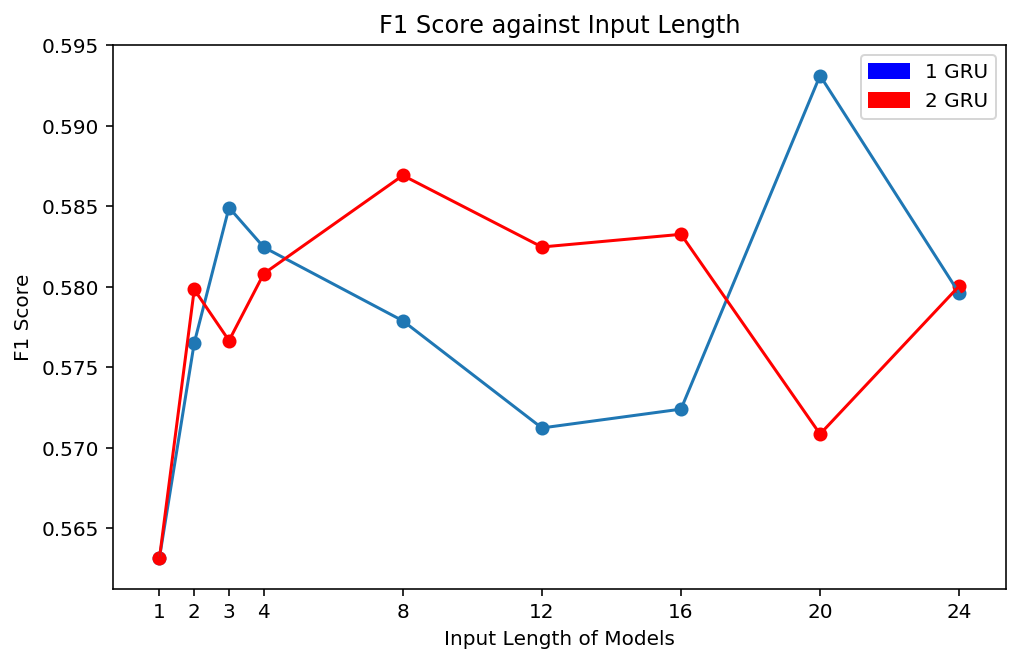

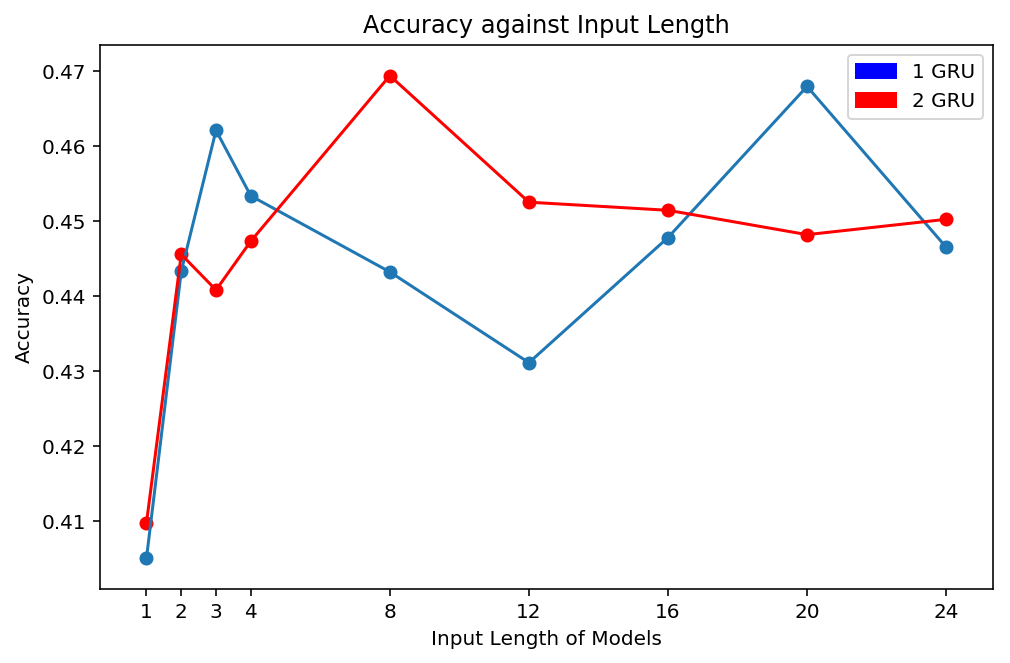

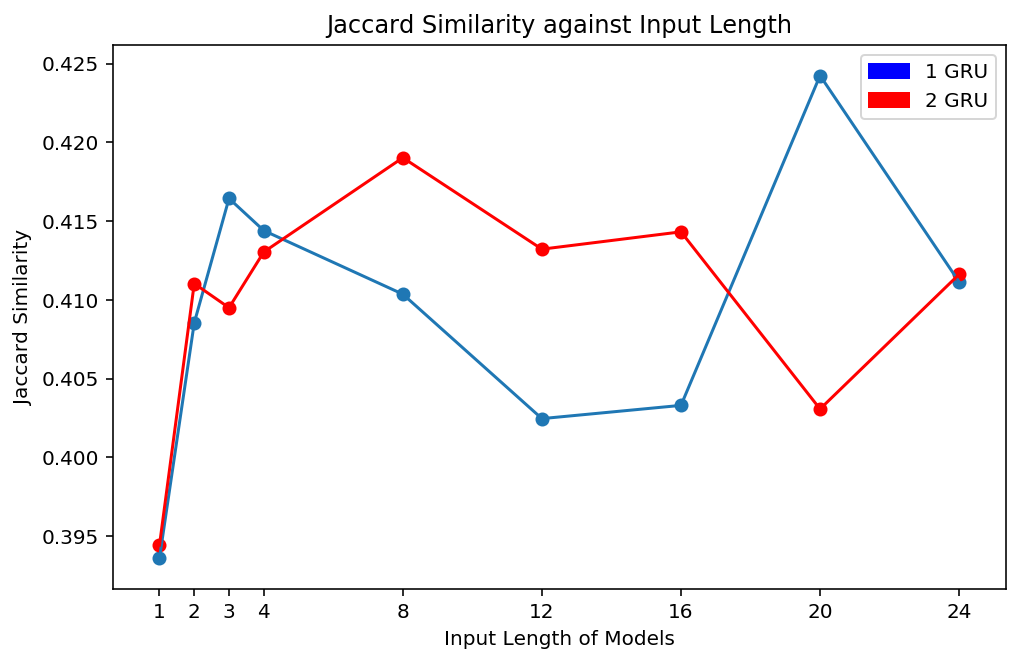

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
yl = ['', 'F1 Score', 'Accuracy', 'Jaccard Similarity']
for i in range(1, 4):
    
    plt.figure(figsize=(8,5))
    plt.plot(rows[0,:,0], rows[0,:,i])
    plt.scatter(rows[0,:,0], rows[0,:,i])
    plt.plot(rows[1,:,0], rows[1,:,i],c='r')
    plt.scatter(rows[1,:,0], rows[1,:,i],c='r')
    plt.xlabel('Input Length of Models')
    plt.ylabel(yl[i])
    plt.xticks(rows[0,:,0])
    plt.title('%s against Input Length' % yl[i])
    plt.legend(handles=[mpatches.Patch(color='blue', label='1 GRU'), mpatches.Patch(color='red', label='2 GRU')])
    plt.show()

In [21]:
data = ScoreData.load('score_data/cosi_2.pkl')
#data = ScoreData(pr.load_df('fun', 0))
new_data = data.copy()

for i in reductions:
    if 'GRU 2' not in i or 'cosi_8' not in i:
        continue
    new_data = reductions[i].predict(new_data, threshold=0.1, name='y_pred_%s' % i)
    
output_names = []
count = 0
for i in reductions:
    if 'GRU 2' not in i or 'cosi_8' not in i:
        continue
    count += 1
    new_data.df['Reduction %d' % count] = new_data.df['y_pred_%s' % i]
    output_names.append('Reduction %d' % count)
new_data.show_score(['x_train'] + output_names)

In [22]:
data = ScoreData.load('score_data/cosi_8.pkl')
data.show_score(['x_train', 'y_train'])

In [53]:
r = Reduction.load('models/20190319l/GRU_%d (%d) (%d) 8.pkl' % (1, 1, 1))

In [54]:
r.params

{'length': 1,
 'features': ['active_rhythm',
  'bass_line',
  'entrance_effect',
  'highest',
  'lowest',
  'occurrence',
  'onset_after_rest',
  'rhythm_variety',
  'strong_beats',
  'sustained_rhythm',
  'vertical_doubling',
  'duration_length']}